# Boston housing prediction price using Linear Regression

First we will be importing the required packages 
They are as follows

In [1]:
%matplotlib inline 
#for good display of notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for avoiding the future warnings
import warnings
warnings.filterwarnings('ignore')


And now we will load the Boston Dataset

# Loading the Dataset

In [2]:
df=pd.read_csv("boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Preprocessing 

In [3]:
#prints the first five rows of the dataset
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#prints the last five rows of the dataset
df.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


As we can observe that we have 506 rows and 15 columns but there s an one unnecessary column ie 'unnamed' as it displays the index values which already set in the dataframe,hence we will drop 

In [5]:
boston=df.drop("Unnamed: 0",axis=1)

In [6]:
#Displays the dataframe without the unnamed column
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
# provides the all the information of the data frame
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


We can observe here that the column names and there datatypes with non-null count,there are 11 columns with float data type and 3 integer type

In [8]:
#Describes the statistical info
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#Gives the sum count of Nan ( Not an integer)
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# Exploratory Data Analysis

After understanding the data now we will analyze the dataset using matplotlib and seaborn packages

First we will plot the distribution of the target variable 'medv' by using distplot function from the seaborn library

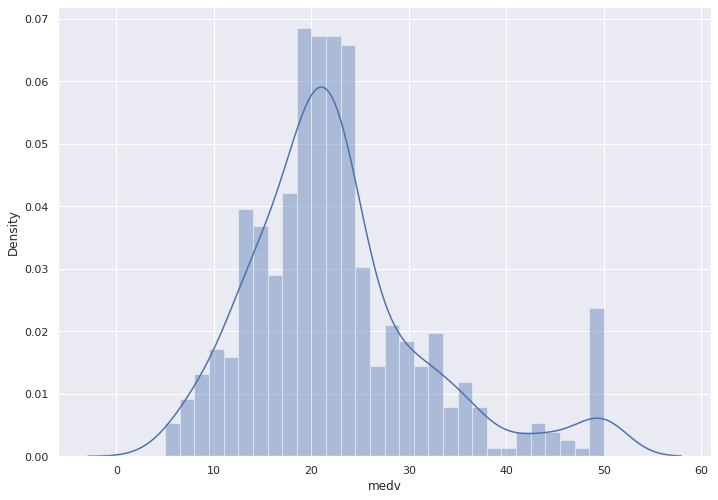

In [10]:
#printing the distplot of the column medv as we need to understand it's variations
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['medv'],bins=30)
plt.show()

Now we create a correlation matrix that measures the linear relationship between the variables.The corr function from the pandas library and we will use the heat map function from seaborn to analyze the correlation

In [11]:
correlation=boston.corr()

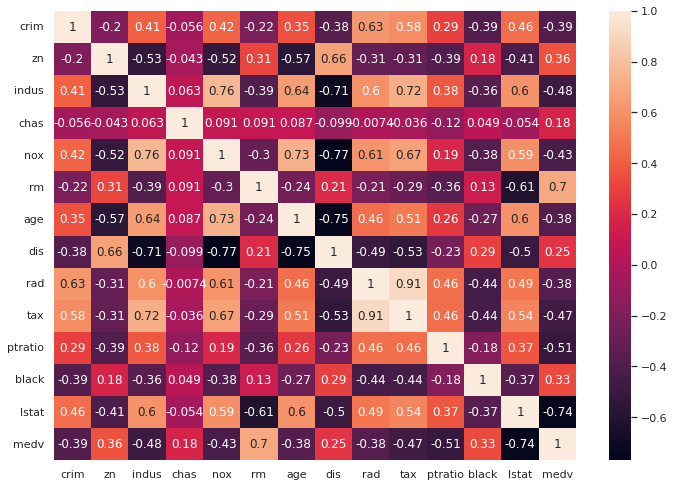

In [12]:
#The linear relationship between the features is observed
sns.heatmap(data=correlation,annot=True)
plt.show()

The correlation coefficient ranges from -1 to 1 
If  the value is close to 1 it means that thers is postive relationship between the variables and
if it is near -1 then it shows that there is negative correlation between the variables


Now based on the observation we will take 'rm' and 'lstat' as features and plot the scatter plot against the 'medv' column

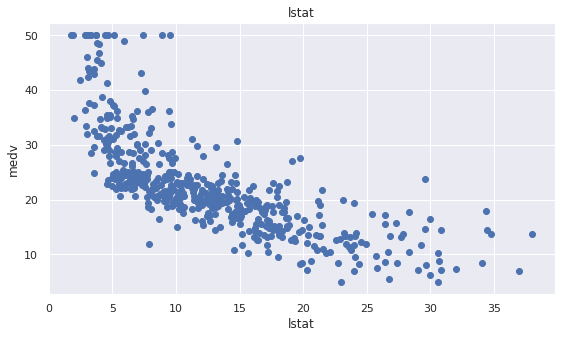

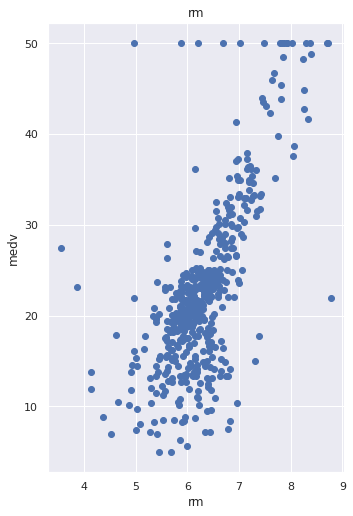

In [13]:
plt.figure(figsize=(20,5))
features=['lstat','rm']
target=boston['medv']
for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=boston[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')
    plt.show()


# Training with Linear regression Model

First we should prepare the data for Training the model for that we conatenate the 'lstat' and 'rm' columns using np.c_ function from numpy library
and store it in X variable
and now we will take our target variable 'medv' and store it in Y variable

In [20]:
X=pd.DataFrame(np.c_[boston['lstat'],boston['rm']],columns=['lstat','rm'])
Y=boston['medv']

Now we will split the data into 'train' set and 'test' set using train_test_split
function provided by sckit-learn library

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
#The shape of the 4 splited sets Will be returned
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


We use LinearRegression to train our model on the given sets

In [21]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
  

LinearRegression()

In [22]:
prediction=lm.predict(X_test)
prediction

array([37.38999403, 29.79290611, 25.86755297,  0.31370828, 33.31385559,
        7.97136102, 30.7066387 , 27.83076842, 26.26693081, 21.97871678,
       32.33149332, 23.21791374, 22.9932889 , 30.97465356, 27.19747687,
       20.7171544 , -0.67524986, 18.01248654, 12.3108109 , 21.90615827,
        4.82262227, 24.00423026, 37.70279396, 24.59521859, 29.6355729 ,
       12.5396288 , 27.07081337, 22.44485896, 27.64895322, 28.99223597,
       11.38689571, 10.39119661, 18.02726641, 24.65916571, 26.3259374 ,
       22.97547671, 26.32610451, 12.30204538, 37.03909693, 33.55198947,
       20.2779501 ,  1.0905118 , 27.65786778, 16.52789139, 27.49181818,
       29.91634422, -3.04746229, 17.23365847, 20.71953914, 13.74285813,
       20.74965837, 21.48012369, 25.17310326, 16.12470269, 17.61200383,
       27.89189158, 36.0647476 , 19.67862758, 28.88714637, 20.4560256 ,
       20.11858445, 23.1131674 , 16.53445226, 31.30827991, 22.62162748,
       13.10525045, 23.36377939, 25.90474345, 23.00735629, 21.62

# Evaluation and Error scores

Now we will evaluate our model by importing metrics library from sklearn 

In [18]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, prediction))
print('Mean squared error:',metrics.mean_squared_error(Y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, prediction)))


Mean absolute error: 3.7913102133431056
Mean squared error: 26.392886822666078
RMSE: 5.13740078470291


In [25]:
from sklearn.metrics import r2_score
print('r2_score:',r2_score(Y_test, prediction))

r2_score: 0.6628996975186954


According to the r2_score we can say that the model predicts moderately

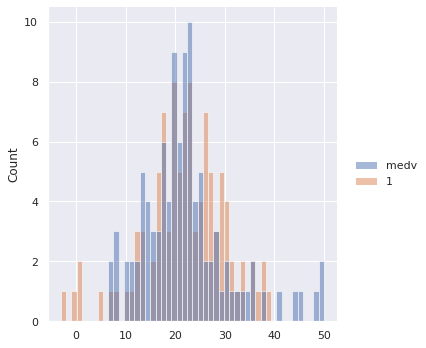

In [19]:
sns.displot((Y_test, prediction),bins=50);

From the above cell we can observe that the model is predicting close to the actual results